In [3]:
# Cell 1: Import libraries and set up environment
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ensure the output directory exists
os.makedirs('../reports/eda_plots', exist_ok=True)

# Set Matplotlib style (use 'seaborn-v0_8' or 'ggplot' for compatibility)
try:
    plt.style.use('seaborn-v0_8')  # Compatible with newer Matplotlib versions
except OSError:
    plt.style.use('ggplot')  # Fallback to ggplot if seaborn-v0_8 is unavailable
    print("Warning: 'seaborn-v0_8' style not found, using 'ggplot' instead.")

In [4]:
# Cell 2: Load cleaned datasets with error handling
try:
    df_fraud = pd.read_csv('../data/processed/Fraud_Data_cleaned.csv')
    df_credit = pd.read_csv('../data/processed/creditcard_cleaned.csv')
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Ensure 'Fraud_Data_cleaned.csv' and 'creditcard_cleaned.csv' are in '../data/processed/'")
    raise



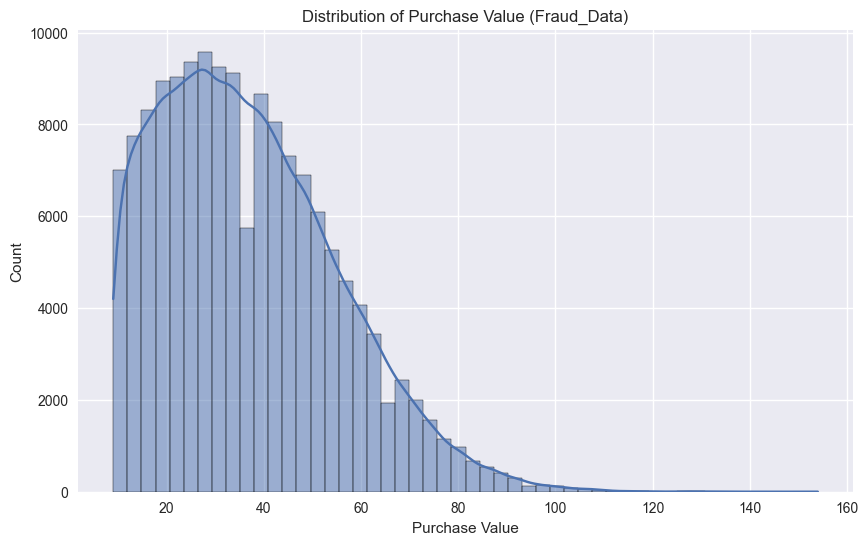

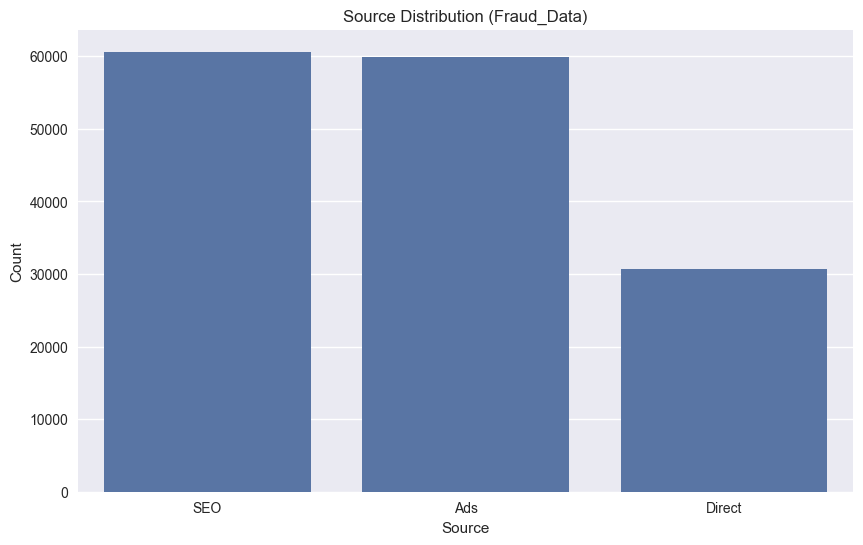

Class Distribution (Fraud_Data):
class
0    0.906354
1    0.093646
Name: proportion, dtype: float64


In [5]:
# Cell 3: Univariate Analysis - Fraud_Data.csv
# Histogram for purchase_value
plt.figure(figsize=(10, 6))
sns.histplot(df_fraud['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value (Fraud_Data)')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.savefig('../reports/eda_plots/fraud_purchase_value_hist.png', dpi=300, bbox_inches='tight')
plt.show()

# Count plot for source
plt.figure(figsize=(10, 6))
sns.countplot(data=df_fraud, x='source', order=df_fraud['source'].value_counts().index)
plt.title('Source Distribution (Fraud_Data)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.savefig('../reports/eda_plots/fraud_source_count.png', dpi=300, bbox_inches='tight')
plt.show()

# Class distribution
print("Class Distribution (Fraud_Data):")
print(df_fraud['class'].value_counts(normalize=True))



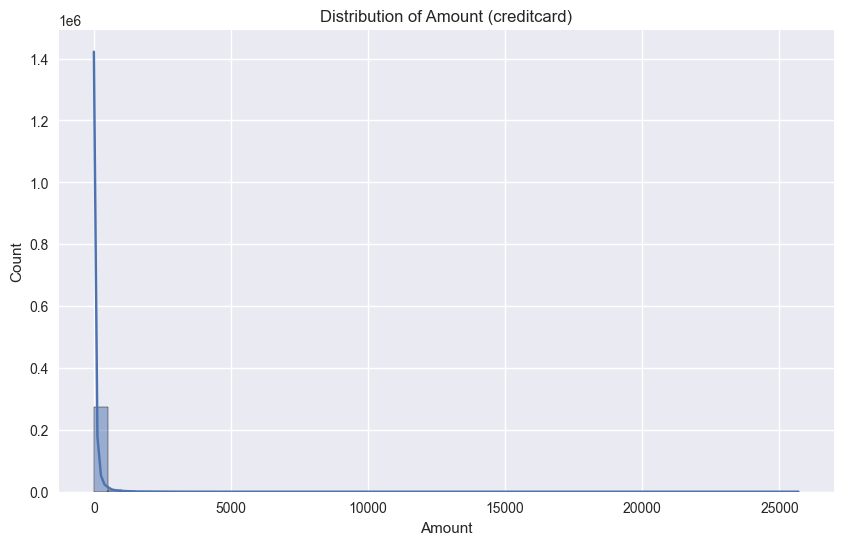

Class Distribution (creditcard):
Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


In [6]:
# Cell 4: Univariate Analysis - creditcard.csv
# Histogram for Amount
plt.figure(figsize=(10, 6))
sns.histplot(df_credit['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount (creditcard)')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.savefig('../reports/eda_plots/credit_amount_hist.png', dpi=300, bbox_inches='tight')
plt.show()

# Class distribution
print("Class Distribution (creditcard):")
print(df_credit['Class'].value_counts(normalize=True))



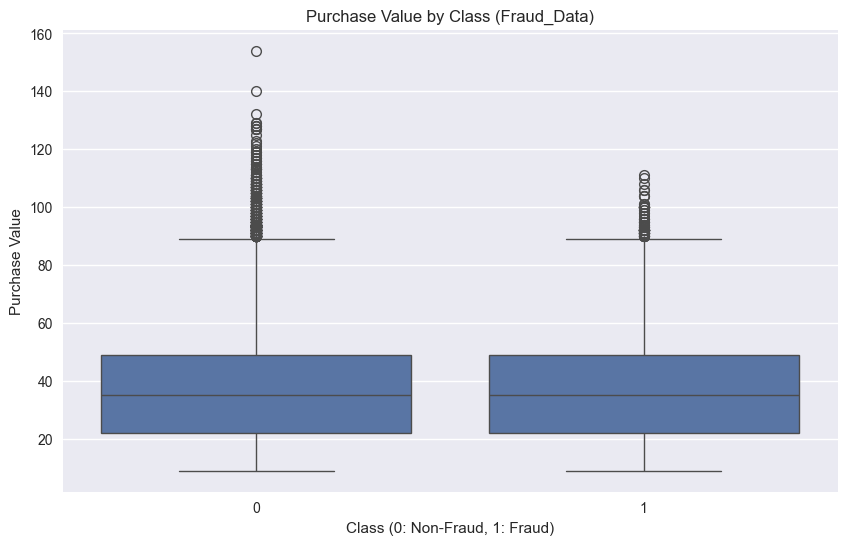

In [7]:
# Cell 5: Bivariate Analysis - Fraud_Data.csv
# Boxplot for purchase_value by class
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=df_fraud)
plt.title('Purchase Value by Class (Fraud_Data)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Purchase Value')
plt.savefig('../reports/eda_plots/fraud_purchase_value_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()



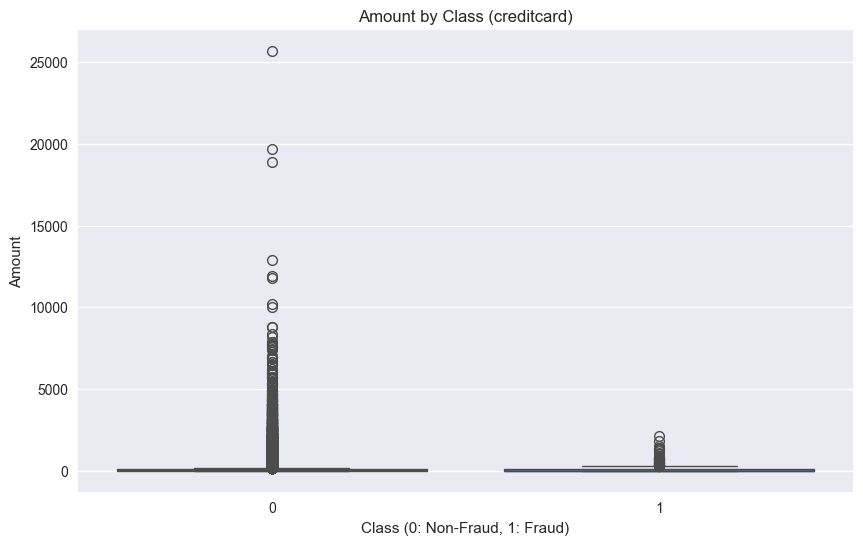

In [8]:
# Cell 6: Bivariate Analysis - creditcard.csv
# Boxplot for Amount by Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=df_credit)
plt.title('Amount by Class (creditcard)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Amount')
plt.savefig('../reports/eda_plots/credit_amount_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()



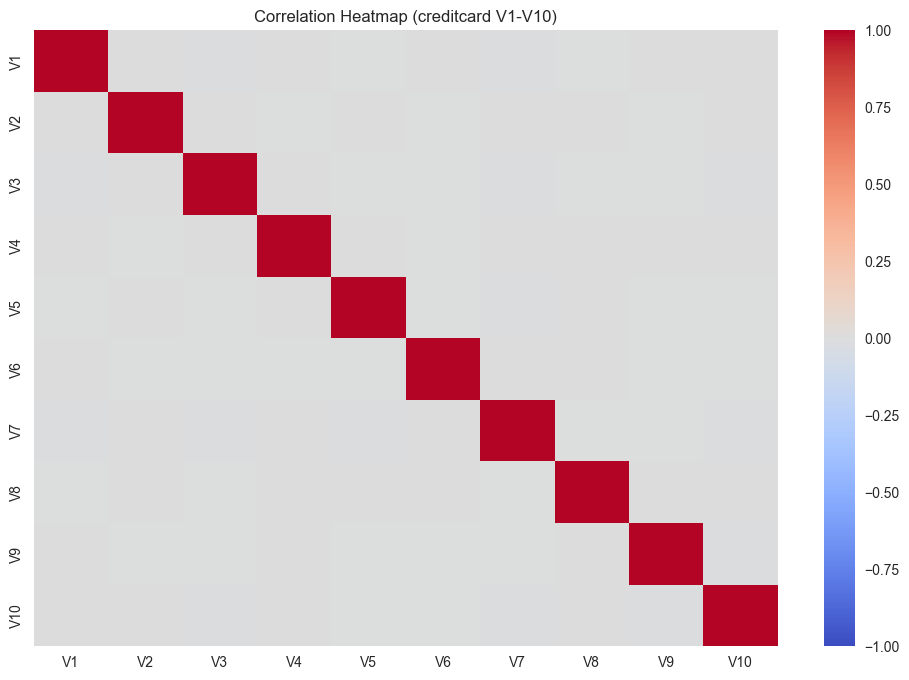

In [9]:
# Cell 7: Correlation Heatmap - creditcard.csv
plt.figure(figsize=(12, 8))
correlation_matrix = df_credit[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (creditcard V1-V10)')
plt.savefig('../reports/eda_plots/credit_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()